Initial graph as drawn below is derived from chatgpt: https://chatgpt.com/share/17f530f2-8dc4-40ed-bf4c-3dba1106f403

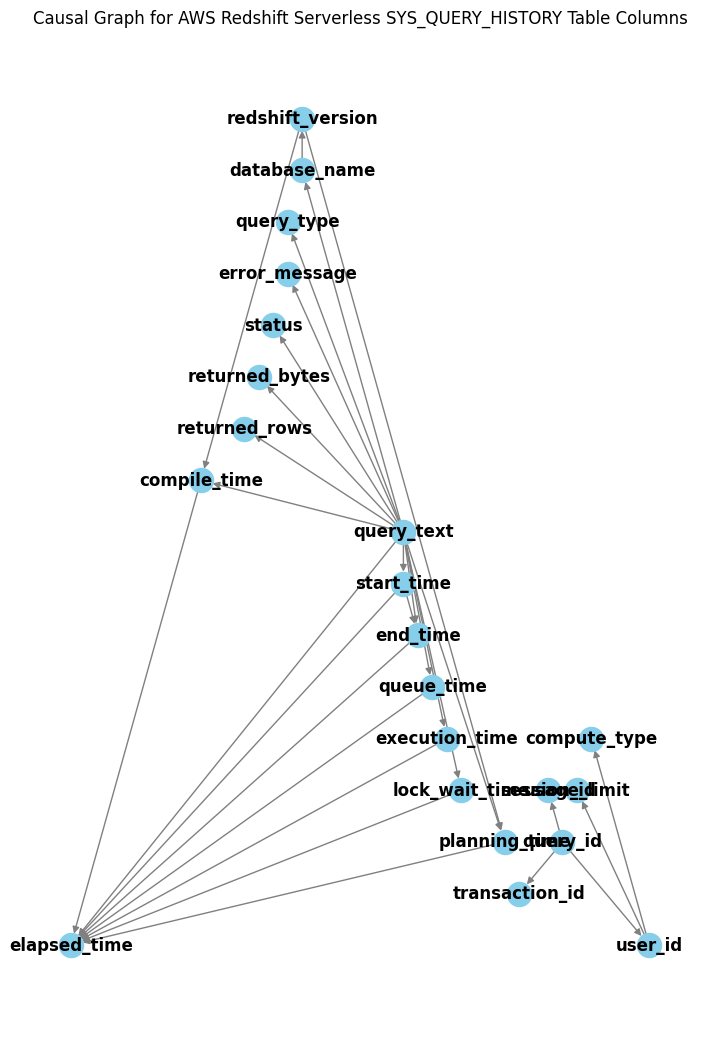

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Creating a directed graph
G = nx.DiGraph()

# Adding nodes (columns)
columns = ['user_id', 'query_id', 'query_label', 'transaction_id', 'session_id',
           'database_name', 'query_type', 'status', 'result_cache_hit',
           'start_time', 'end_time', 'elapsed_time', 'queue_time',
           'execution_time', 'error_message', 'returned_rows', 'returned_bytes',
           'query_text', 'redshift_version', 'usage_limit', 'compute_type',
           'compile_time', 'planning_time', 'lock_wait_time']

# Adding edges (causal relationships) based on descriptions
edges = [
    ('query_text', 'query_type'),  # query_text influences query_type
    ('query_text', 'database_name'),  # query_text influences database_name
    ('query_text', 'start_time'),  # query_text influences start_time
    ('query_text', 'end_time'),  # query_text influences end_time
    ('query_text', 'elapsed_time'),  # query_text influences elapsed_time
    ('query_text', 'queue_time'),  # query_text influences queue_time
    ('query_text', 'execution_time'),  # query_text influences execution_time
    ('query_text', 'returned_rows'),  # query_text influences returned_rows
    ('query_text', 'returned_bytes'),  # query_text influences returned_bytes
    ('query_text', 'compile_time'),  # query_text influences compile_time
    ('query_text', 'planning_time'),  # query_text influences planning_time
    ('query_text', 'lock_wait_time'),  # query_text influences lock_wait_time
    ('query_text', 'status'),  # query_text influences status
    ('query_text', 'error_message'),  # query_text influences error_message
    ('query_id', 'transaction_id'),  # query_id influences transaction_id
    ('query_id', 'session_id'),  # query_id influences session_id
    ('query_id', 'user_id'),  # query_id influences user_id
    ('start_time', 'end_time'),  # start_time influences end_time
    ('start_time', 'elapsed_time'),  # start_time influences elapsed_time
    ('end_time', 'elapsed_time'),  # end_time influences elapsed_time
    ('execution_time', 'elapsed_time'),  # execution_time influences elapsed_time
    ('compile_time', 'elapsed_time'),  # compile_time influences elapsed_time
    ('planning_time', 'elapsed_time'),  # planning_time influences elapsed_time
    ('queue_time', 'elapsed_time'),  # queue_time influences elapsed_time
    ('lock_wait_time', 'elapsed_time'),  # lock_wait_time influences elapsed_time
    ('user_id', 'usage_limit'),  # user_id influences usage_limit
    ('user_id', 'compute_type'),  # user_id influences compute_type
    ('database_name', 'redshift_version'),  # database_name influences redshift_version
    ('redshift_version', 'compile_time'),  # redshift_version influences compile_time
    ('redshift_version', 'planning_time'),  # redshift_version influences planning_time
]

# Adding edges to the graph
G.add_edges_from(edges)

# Drawing the graph optimizing layout for better visualization
plt.figure(figsize=(7, 10))
pos = nx.planar_layout(G)
nx.draw(G,  pos=pos, with_labels=True, node_size=300, node_color='skyblue', font_size=12, font_weight='bold', edge_color='gray')
plt.title("Causal Graph for AWS Redshift Serverless SYS_QUERY_HISTORY Table Columns")
plt.show()


In [4]:
# Dump the edges into the file format that SSumM expects.

# Map each node to an integer and dump the mapping
node_to_int = {node: i for i, node in enumerate(columns)}

with open('../graphs/ssumm_node_encoding.csv', 'w') as f:
    for node, i in node_to_int.items():
        f.write(f'{node},{i}\n')

# Dump the edges

with open('../graphs/ssumm_edges.tsv', 'w') as f:
    for edge in edges:
        f.write(f'{node_to_int[edge[0]]}\t{node_to_int[edge[1]]}\n')